# Implementación de Perceptrón

In [3]:
import numpy as np

class Perceptron(object):
    '''Clasificador Perceptron simple.'''
    def __init__(self, eta = 0.5, n_iter = 100, random_state = 1):
        self.eta = eta # Tasa de aprendizaje entre 0.0 y 1.0
        self.n_iter = n_iter # n_iter es el número de iteraciones sobre el conjunto de entrenamiento
        self.random_state = random_state # Semilla para la generación de números aleatorios

    def fit(self, X, y):
        '''Ajusta el modelo a los datos de entrenamiento 
        X: Vector de datos de entrenamiento 
            n_features = numero de características
        y: Vector de etiquetas de respuesta

        self: objeto Perceptron ajustado
        '''
        rgen = np.random.RandomState(self.random_state) # Inicializa el generador de números aleatorios
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) # Inicializa los pesos con 
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
    
    def net_input(self, X):
        '''Calcula la entrada neta para el perceptron.'''
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        '''Realiza la predicción de clase para un vector de entrada X.'''
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [17]:
import pandas as pd
data = pd.read_csv('./data/pima-indians-diabetes.csv')
# data = [[1,1], [1,-1], [-1,1], [-1,-1]]
# X = np.array(data)
# y = np.array([1, -1, -1, -1])  # Etiquetas de clase

# print(X)
# print(y)
X = data.iloc[:, :-1].values  # Todas las columnas excepto la última
y = data.iloc[:, -1].values  # Solo la última columna
y = np.where(y == 0, -1, 1)  # Convertir etiquetas 0 a -1 para el perceptron
perceptron = Perceptron(eta=0.1, n_iter=10, random_state=1)
perceptron.fit(X, y)
print("Pesos del Perceptron:", perceptron.w_)

Pesos del Perceptron: [ -54.18375655  228.39388244  161.59471828 -308.21072969 -194.79134592
   47.17698461  126.49744812   13.70438793   48.40319039]


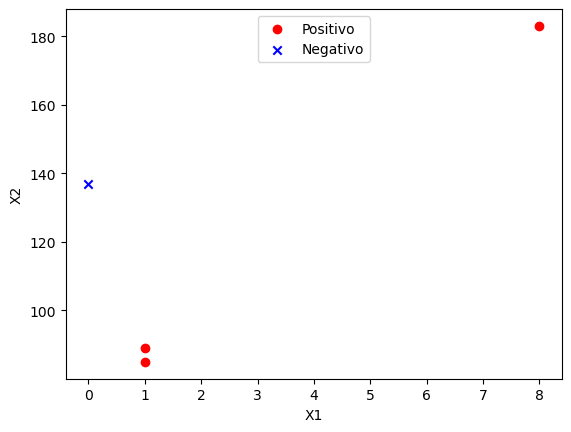

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

#visualizar los datos
plt.scatter(X[0:3, 0], X[0:3, 1], color = 'red', marker = 'o', label = 'Positivo')
plt.scatter(X[3, 0], X[3, 1], color = 'blue', marker = 'x', label = 'Negativo')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper center')

plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4368\195714007.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


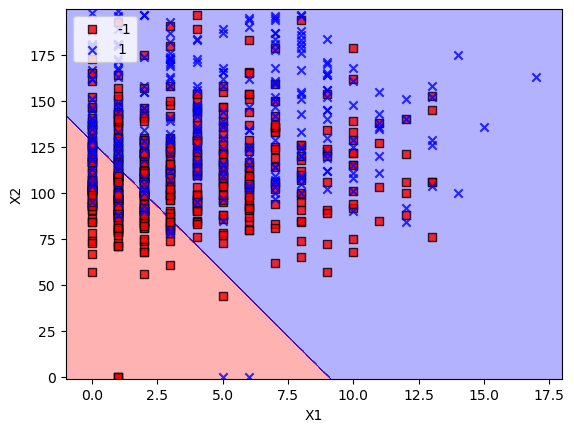

In [23]:
X_plot = X[:, [0, 1]]
ppn_plot = Perceptron(eta=0.5, n_iter=100)
ppn_plot.fit(X_plot, y)

plot_decision_regions(X_plot, y, classifier=ppn_plot)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.show()

In [24]:

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=20)
# plt.xlabel('X1')
# plt.ylabel('X2')
# plt.legend(loc='upper left')

# plt.show()

ValueError: shapes (9547500,2) and (8,) not aligned: 2 (dim 1) != 8 (dim 0)